# Sentiment Analysis and Topics over Time

In [1]:
# Basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle 

from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud

import umap

#sklearn
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation, PCA

In [2]:
with open('../data_files/processed_tweets.pickle', 'rb') as read_file:
    df = pickle.load(read_file)

In [3]:
df.head()

,clean,processed
0,islam kills are you trying to say that there w...,islam kill try say terrorist attack europe ref...
1,clinton trump should ve apologized more attack...,clinton trump apologize attack little
2,who was is the best president of the past year...,well president past retweet
3,i don t have to guess your religion christmasa...,guess religion christmasaftermath
4,pence and his lawyers decided which of his off...,pence lawyer decide official email public can see


In [4]:
proc_tweets = df.processed

In [5]:
vectorizer = CountVectorizer(token_pattern="\\b[a-z][a-z]+\\b",
                             binary=True,
                             stop_words='english')

In [6]:
dtm_tf = vectorizer.fit_transform(proc_tweets)
print(dtm_tf.shape)

(203482, 77822)


In [7]:
%%time

lda_model = LatentDirichletAllocation(n_components=6, random_state=42)
lda_model.fit(dtm_tf)

lda_doc_matrix = lda_model.transform(dtm_tf)

CPU times: user 5min 54s, sys: 4.79 s, total: 5min 58s
Wall time: 6min


In [8]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [9]:
terms = vectorizer.get_feature_names()

display_topics(lda_model, terms, 25)


Topic  0
trump, news, post, new, merkel, die, debate, muss, video, politic, watch, clinton, election, anti, ist, tonight, photo, presidential, court, live, protest, rally, youtube, hat, betteralternativetodebates

Topic  1
obama, tcot, pjnet, ccot, trump, gop, god, wakeupamerica, election, away, day, america, plan, need, president, teaparty, sign, world, house, leave, office, obamacare, people, todolistbeforechristmas, come

Topic  2
like, people, love, play, make, thing, know, time, day, life, twitter, look, tweet, think, game, need, thank, come, want, say, use, feel, world, let, work

Topic  3
trump, donald, hillary, clinton, real, say, president, america, maga, people, obama, politic, make, want, country, like, voter, white, american, time, medium, support, poll, americans, supporter

Topic  4
good, man, midnight, woman, kill, black, police, stop, say, shoot, new, islam, old, cruz, people, family, make, attack, girl, muslim, ted, child, death, school, want

Topic  5
clinton, hillar

In [10]:
topic_cols = ['news', 'conservative', 'general_twitter', 'trump', 'violence', 'clinton']

In [11]:
lda_doc_matrix

array([[0.01668614, 0.01671921, 0.01676255, 0.01687818, 0.9162238 ,
        0.01673013],
       [0.02784275, 0.02785185, 0.02807543, 0.85996697, 0.02811381,
        0.0281492 ],
       [0.041671  , 0.04187765, 0.04231849, 0.79062642, 0.04172208,
        0.04178435],
       ...,
       [0.02383652, 0.02384963, 0.88057349, 0.02393875, 0.02385778,
        0.02394382],
       [0.02397061, 0.02426326, 0.02429331, 0.02403896, 0.54554694,
        0.35788692],
       [0.01862333, 0.01883651, 0.90652258, 0.01880578, 0.01866339,
        0.01854841]])

In [12]:
lda_df = pd.DataFrame(lda_doc_matrix, columns=topic_cols)

In [13]:
lda_df['label'] = lda_df.idxmax(axis=1)

In [14]:
text = pd.read_csv('../data_files/tweets.csv.zip')
text.head()

,user_id,user_key,created_at,created_str,retweet_count,retweeted,favorite_count,text,tweet_id,source,hashtags,expanded_urls,posted,mentions,retweeted_status_id,in_reply_to_status_id
0,1.868981e+09,ryanmaxwell_1,1.458672e+12,2016-03-22 18:31:42,NaN,NaN,NaN,#IslamKills Are you trying to say that there w...,7.123460e+17,NaN,"[""IslamKills""]",[],POSTED,[],NaN,NaN
1,2.571870e+09,detroitdailynew,1.476133e+12,2016-10-10 20:57:00,0.0,False,0.0,"Clinton: Trump should’ve apologized more, atta...",7.855849e+17,"<a href=""http://twitterfeed.com"" rel=""nofollow...",[],"[""http://detne.ws/2e172jF""]",POSTED,[],NaN,NaN
2,1.710805e+09,cookncooks,1.487767e+12,2017-02-22 12:43:43,NaN,NaN,NaN,RT @ltapoll: Who was/is the best president of ...,8.343832e+17,NaN,[],[],POSTED,[],NaN,NaN
3,2.584153e+09,queenofthewo,1.482765e+12,2016-12-26 15:06:41,NaN,NaN,NaN,RT @jww372: I don't have to guess your religio...,8.134006e+17,NaN,"[""ChristmasAftermath""]",[],POSTED,[],NaN,NaN
4,1.768260e+09,mrclydepratt,1.501987e+12,2017-08-06 02:36:24,NaN,NaN,NaN,RT @Shareblue: Pence and his lawyers decided w...,8.940243e+17,NaN,[],[],POSTED,[],NaN,NaN


In [15]:
lda_df['handle'] = text['user_key']
lda_df['datetime'] = text['created_str']
lda_df['tweet'] = text['text']

In [16]:
lda_df.head()

,news,conservative,general_twitter,trump,violence,clinton,label,handle,datetime,tweet
0,0.016686,0.016719,0.016763,0.016878,0.916224,0.016730,violence,ryanmaxwell_1,2016-03-22 18:31:42,#IslamKills Are you trying to say that there w...
1,0.027843,0.027852,0.028075,0.859967,0.028114,0.028149,trump,detroitdailynew,2016-10-10 20:57:00,"Clinton: Trump should’ve apologized more, atta..."
2,0.041671,0.041878,0.042318,0.790626,0.041722,0.041784,trump,cookncooks,2017-02-22 12:43:43,RT @ltapoll: Who was/is the best president of ...
3,0.041698,0.041748,0.042370,0.041795,0.789994,0.042395,violence,queenofthewo,2016-12-26 15:06:41,RT @jww372: I don't have to guess your religio...
4,0.024031,0.023984,0.023932,0.279995,0.023941,0.624117,clinton,mrclydepratt,2017-08-06 02:36:24,RT @Shareblue: Pence and his lawyers decided w...


In [17]:
dt_df = lda_df[['handle', 'datetime', 'tweet', 'label', 
               'trump', 'clinton', 'conservative', 'violence', 'news', 'general_twitter']] 

In [18]:
dt_df

,handle,datetime,tweet,label,trump,clinton,conservative,violence,news,general_twitter
0,ryanmaxwell_1,2016-03-22 18:31:42,#IslamKills Are you trying to say that there w...,violence,0.016878,0.016730,0.016719,0.916224,0.016686,0.016763
1,detroitdailynew,2016-10-10 20:57:00,"Clinton: Trump should’ve apologized more, atta...",trump,0.859967,0.028149,0.027852,0.028114,0.027843,0.028075
2,cookncooks,2017-02-22 12:43:43,RT @ltapoll: Who was/is the best president of ...,trump,0.790626,0.041784,0.041878,0.041722,0.041671,0.042318
3,queenofthewo,2016-12-26 15:06:41,RT @jww372: I don't have to guess your religio...,violence,0.041795,0.042395,0.041748,0.789994,0.041698,0.042370
4,mrclydepratt,2017-08-06 02:36:24,RT @Shareblue: Pence and his lawyers decided w...,clinton,0.279995,0.624117,0.023984,0.023941,0.024031,0.023932
...,...,...,...,...,...,...,...,...,...,...
203477,nojonathonno,2016-11-01 12:13:06,"RT @AndreaChalupa: In intel circles, the story...",clinton,0.012089,0.940005,0.011954,0.012005,0.011966,0.011982
203478,judelambertusa,2015-06-18 01:04:35,RT @KansasCityDNews: Tonganoxie police: Middle...,violence,0.016794,0.016785,0.016877,0.916045,0.016775,0.016724
203479,patriotblake,2017-01-10 18:50:48,RT @signsinyork: Getting the right #company lo...,general_twitter,0.023939,0.023944,0.023850,0.023858,0.023837,0.880573
203480,dailysandiego,2016-11-20 21:49:07,The Latest: Obama affirms continuity of ties w...,violence,0.024039,0.357887,0.024263,0.545547,0.023971,0.024293


In [19]:
print(f'Number of unique accounts: {len(dt_df.handle.unique())}')

Number of unique accounts: 454


In [20]:
dt_df['datetime'] = pd.to_datetime(dt_df['datetime'])

In [21]:
dt_df['month'] = dt_df['datetime'].dt.strftime('%Y-%m')

In [22]:
dt_df.head()

,handle,datetime,tweet,label,trump,clinton,conservative,violence,news,general_twitter,month
0,ryanmaxwell_1,2016-03-22 18:31:42,#IslamKills Are you trying to say that there w...,violence,0.016878,0.016730,0.016719,0.916224,0.016686,0.016763,2016-03
1,detroitdailynew,2016-10-10 20:57:00,"Clinton: Trump should’ve apologized more, atta...",trump,0.859967,0.028149,0.027852,0.028114,0.027843,0.028075,2016-10
2,cookncooks,2017-02-22 12:43:43,RT @ltapoll: Who was/is the best president of ...,trump,0.790626,0.041784,0.041878,0.041722,0.041671,0.042318,2017-02
3,queenofthewo,2016-12-26 15:06:41,RT @jww372: I don't have to guess your religio...,violence,0.041795,0.042395,0.041748,0.789994,0.041698,0.042370,2016-12
4,mrclydepratt,2017-08-06 02:36:24,RT @Shareblue: Pence and his lawyers decided w...,clinton,0.279995,0.624117,0.023984,0.023941,0.024031,0.023932,2017-08


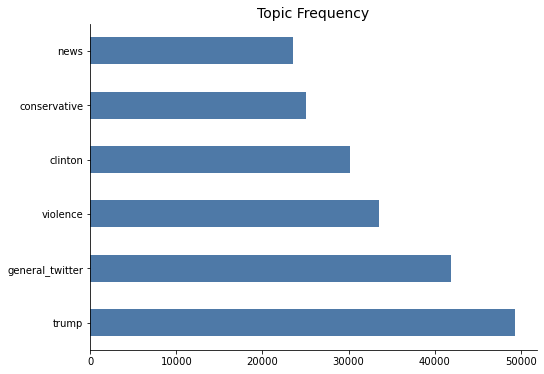

In [23]:
plt.figure(figsize=(8, 6))
dt_df['label'].value_counts(ascending=False).plot(kind='barh', color='#4e79a7')
plt.title('Topic Frequency', fontsize=14)
sns.despine();

In [24]:
date_freq = dt_df.groupby(['month', 'label']).size().unstack().reset_index()

In [25]:
date_freq.fillna(0, inplace=True)
date_freq['total'] = date_freq.sum(axis=1)

In [26]:
date_freq

label,month,clinton,conservative,general_twitter,news,trump,violence,total
0,2014-07,0.0,2.0,8.0,0.0,0.0,2.0,12.0
1,2014-08,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2014-09,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2014-11,23.0,53.0,185.0,29.0,40.0,58.0,388.0
4,2014-12,20.0,55.0,231.0,40.0,40.0,56.0,442.0
5,2015-01,143.0,244.0,1107.0,178.0,154.0,365.0,2191.0
6,2015-02,179.0,246.0,949.0,182.0,188.0,347.0,2091.0
7,2015-03,241.0,258.0,948.0,304.0,168.0,406.0,2325.0
8,2015-04,264.0,277.0,690.0,266.0,213.0,540.0,2250.0
9,2015-05,262.0,317.0,456.0,240.0,180.0,445.0,1900.0


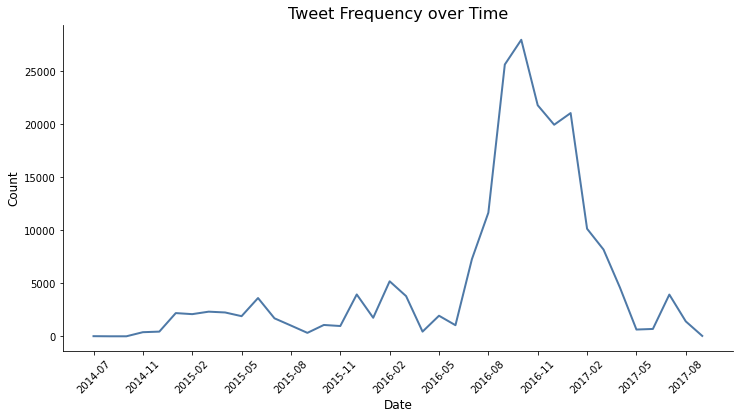

In [27]:
dates = date_freq.month
total_tweets = date_freq.total
x_ticks = list(date_freq.month.unique()[::3])

plt.figure(figsize=(12, 6))
plt.plot(dates, total_tweets, color='#4e79a7', linewidth=2)
plt.title('Tweet Frequency over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(x_ticks, rotation=45)
sns.despine();

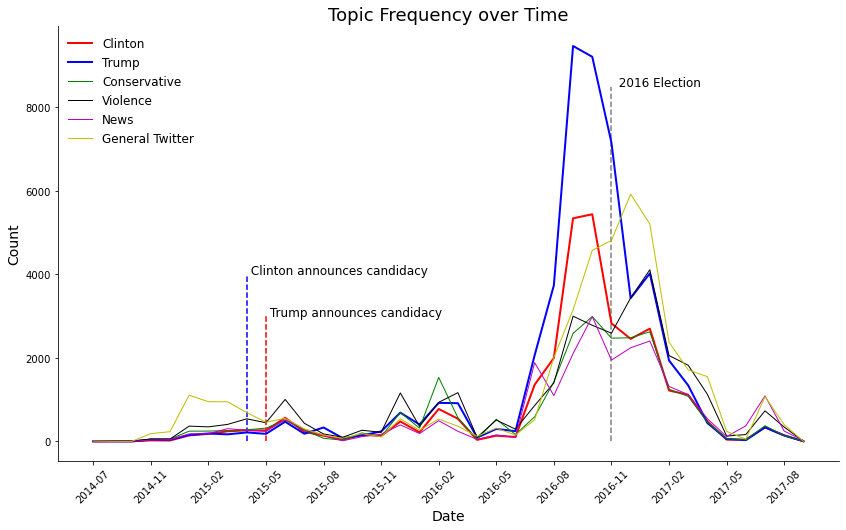

In [28]:
dates = date_freq.month
x_ticks = list(date_freq.month.unique()[::3])

clinton = date_freq.clinton
conservative = date_freq.conservative
gen_twitter = date_freq.general_twitter
news = date_freq.news
trump = date_freq.trump
violence = date_freq.violence

plt.figure(figsize=(14, 8))
plt.plot(dates, clinton, color='r', linewidth=2, label='Clinton')
plt.plot(dates, trump, color='b', linewidth=2, label='Trump')

plt.plot(dates, conservative, color='g', linewidth=1, label='Conservative')
plt.plot(dates, violence, color='0', linewidth=1, label='Violence')
plt.plot(dates, news, color='m', linewidth=1, label='News')
plt.plot(dates, gen_twitter, color='y', linewidth=1, label='General Twitter')

plt.vlines('2015-04', ymin=0, ymax=4000, linestyle='--', color='b')
plt.text('2015-04', 4000, ' Clinton announces candidacy', rotation=0, fontsize=12)

plt.vlines('2015-05', ymin=0, ymax=3000, linestyle='--', color='r')
plt.text('2015-05', 3000, ' Trump announces candidacy', rotation=0, fontsize=12)

# plt.vlines('2016-10', ymin=0, ymax=6600, linestyle='--', color='grey')
# plt.text('2016-10', 6600, 'Comey announces FBI investigation', rotation=0, fontsize=12)

plt.vlines('2016-11', ymin=0, ymax=8500, linestyle='--', color='grey')
plt.text('2016-11', 8500, '  2016 Election', rotation=0, fontsize=12)


plt.title('Topic Frequency over Time', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(x_ticks, rotation=45)
plt.legend(loc='upper left', frameon=False, fontsize=12)
sns.despine()
#plt.savefig('../img/top_freq_timeseries.png');

## Sentiment Analysis

Using Vader Sentiment Analysis

In [41]:
def sentiment_score(text):
    analyzer = SentimentIntensityAnalyzer()
    compound_score = analyzer.polarity_scores(text)['compound']
    return compound_score


def get_the_feels(compound_score):
    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else:
        return 'netural'

In [42]:
feels_df = dt_df[['handle', 'month', 'label', 'tweet']]

In [43]:
feels_df['tweet'] = feels_df['tweet'].astype(str)

<ipython-input-43-1500e1aa9611>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feels_df['tweet'] = feels_df['tweet'].astype(str)


In [44]:
feels_df.head()

,handle,month,label,tweet
0,ryanmaxwell_1,2016-03,violence,#IslamKills Are you trying to say that there w...
1,detroitdailynew,2016-10,trump,"Clinton: Trump should’ve apologized more, atta..."
2,cookncooks,2017-02,trump,RT @ltapoll: Who was/is the best president of ...
3,queenofthewo,2016-12,violence,RT @jww372: I don't have to guess your religio...
4,mrclydepratt,2017-08,clinton,RT @Shareblue: Pence and his lawyers decided w...


In [50]:
trump_feels = feels_df[feels_df.label == 'trump']
trump_feels.head()

,handle,month,label,tweet
1,detroitdailynew,2016-10,trump,"Clinton: Trump should’ve apologized more, atta..."
2,cookncooks,2017-02,trump,RT @ltapoll: Who was/is the best president of ...
5,giselleevns,2016-10,trump,"@ModicaGiunta me, too!"
16,pamela_moore13,2016-09,trump,The war is here! \nThis gentleman made more se...
20,kansasdailynews,2016-07,trump,Obama on Trump winning: 'Anything's possible' ...
...,...,...,...,...
203447,cookncooks,2017-01,trump,RT @_Proud_American: NO MORE OBAMA COVER UP! T...
203449,patriotblake,2016-11,trump,RT @RawDawgBuffalo: Trump Tells Early Voters t...
203450,jaydaastonishin,2016-11,trump,RT @smoothkobra: Obama and Clinton's policies ...
203452,kansasdailynews,2016-07,trump,Highlights from Bill Clinton's past DNC speech...


In [51]:
%%time
trump_feels['vader_score'] = trump_feels['tweet'].map(sentiment_score)

CPU times: user 5min 44s, sys: 7.13 s, total: 5min 51s
Wall time: 5min 52s


<timed exec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [52]:
trump_feels.head()

,handle,month,label,tweet,vader_score
1,detroitdailynew,2016-10,trump,"Clinton: Trump should’ve apologized more, atta...",-0.2484
2,cookncooks,2017-02,trump,RT @ltapoll: Who was/is the best president of ...,0.6369
5,giselleevns,2016-10,trump,"@ModicaGiunta me, too!",0.0000
16,pamela_moore13,2016-09,trump,The war is here! \nThis gentleman made more se...,-0.6360
20,kansasdailynews,2016-07,trump,Obama on Trump winning: 'Anything's possible' ...,0.5267
...,...,...,...,...,...
203447,cookncooks,2017-01,trump,RT @_Proud_American: NO MORE OBAMA COVER UP! T...,-0.7798
203449,patriotblake,2016-11,trump,RT @RawDawgBuffalo: Trump Tells Early Voters t...,-0.2732
203450,jaydaastonishin,2016-11,trump,RT @smoothkobra: Obama and Clinton's policies ...,-0.6486
203452,kansasdailynews,2016-07,trump,Highlights from Bill Clinton's past DNC speech...,0.0000


In [53]:
%%time
clinton_feels = feels_df[feels_df.label == 'clinton']
clinton_feels['vader_score'] = clinton_feels['tweet'].map(sentiment_score)

<ipython-input-53-a163126fe0e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clinton_feels['vader_score'] = clinton_feels['tweet'].map(sentiment_score)


In [138]:
%%time
general_feels = feels_df[feels_df.label == 'general_twitter']
general_feels['vader_score'] = general_feels['tweet'].map(sentiment_score)

<ipython-input-138-7a1814b1a89b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  general_feels['vader_score'] = general_feels['tweet'].map(sentiment_score)


In [139]:
clinton_feels_time = clinton_feels.groupby('month').agg({'vader_score': 'mean'}).reset_index()
trump_feels_time = trump_feels.groupby('month').agg({'vader_score': 'mean'}).reset_index()
general_feels_time = general_feels.groupby('month').agg({'vader_score': 'mean'}).reset_index()

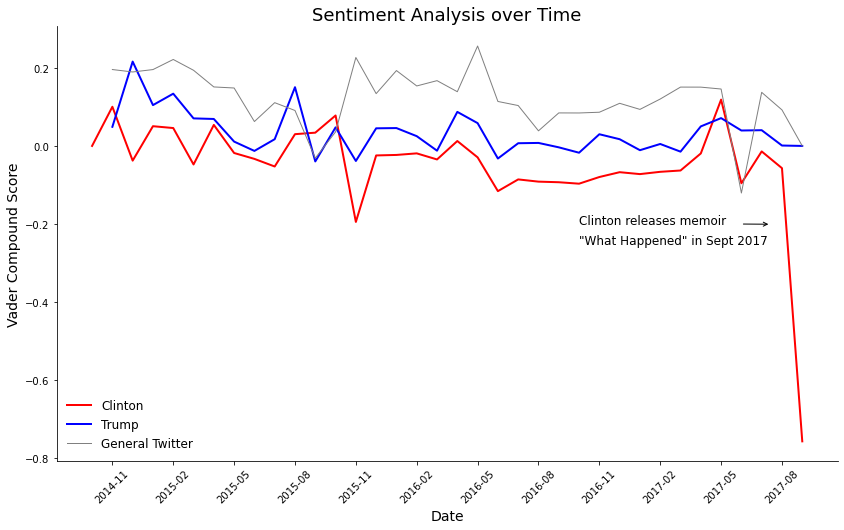

In [244]:
clinton = clinton_feels_time.vader_score
trump = trump_feels_time.vader_score
general = general_feels_time.vader_score[1:]

x_ticks = list(general_feels_time.month.unique()[1::3])

plt.figure(figsize=(14, 8))
plt.plot(clinton_feels_time.month, clinton, color='r', linewidth=2, label='Clinton')
plt.plot(trump_feels_time.month, trump, color='b', linewidth=2, label='Trump')
plt.plot(general_feels_time.month[1:], general, color='grey', linewidth=1, label='General Twitter')

#plt.vlines('2017-08', ymin=-.75, ymax=0, linestyle='-.', color='grey')
plt.annotate("",
            xy=('2017-06', -.2), xycoords='data',
            xytext=('2017-03', -.2), textcoords='offset points',
            arrowprops=dict(arrowstyle="<-", 
                            connectionstyle="arc3", lw=1))

plt.text('2016-10',-.2, 'Clinton releases memoir', rotation=0, fontsize=12)
plt.text('2016-10',-.25, '"What Happened" in Sept 2017 ', rotation=0, fontsize=12)

plt.title('Sentiment Analysis over Time', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Vader Compound Score', fontsize=14)
plt.xticks(x_ticks, rotation=45)
plt.legend(loc='lower left', frameon=False, fontsize=12)
sns.despine()
#plt.savefig('../img/sentiment_timeseries.png');

In [ ]:
# most positive accounts by topic? 
# most negative accounts by topic? 
# number of accounts over time? 
# number of accounts by topic? 